Creaeted to plot the output of coherence_test.py. May be edited to plot other versions of similar output from other files.

In [2]:
import datetime
from matplotlib.colors import LogNorm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np

The section of the Brady's hotspring data we used has some missing time strectches. The next section of code shows the lengths of continuous records and the
associated time of recording.

In [3]:
CONTINUOUS_IND_RANGES = [[0,2314], [2314, 2488], [2488, 2740]]
CONTINUOUS_TIME_RANGES = [[datetime.datetime(2016, 3, 13, 0, 0, 18), datetime.datetime(2016, 3, 14, 14, 34, 48)], [datetime.datetime(2016, 3, 14, 16, 40, 42), datetime.datetime(2016, 3, 14, 19, 35, 12)], [datetime.datetime(2016, 3, 14, 19, 49, 19), datetime.datetime(2016, 3, 14, 23, 59, 19)]]

In [4]:
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_metadata_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    metadata = pickle.load(f)

metadata.keys()
metadata["sub_window_length"]
metadata["sampling_rate"]
metadata['files'][-1]
# meta data int array
met = np.array([int(a) for a in metadata['files']])

intervals = met[1:] - met[:-1]
# plt.hist(intervals, bins=100)
np.where(intervals == np.max(intervals[2889:]))
# intervals[2877:2882] # [2879]
# metadata['files'][4632+342:4632+348]  #[4626:4632]
metadata['files'][4626:4632]
# plt.plot(intervals[4632+345:4632+375])
# plt.yscale("log")
# intervals[4632+345]
# metadata['files'][4977]

['160314143318',
 '160314143348',
 '160314143418',
 '160314164042',
 '160314164112',
 '160314164142']

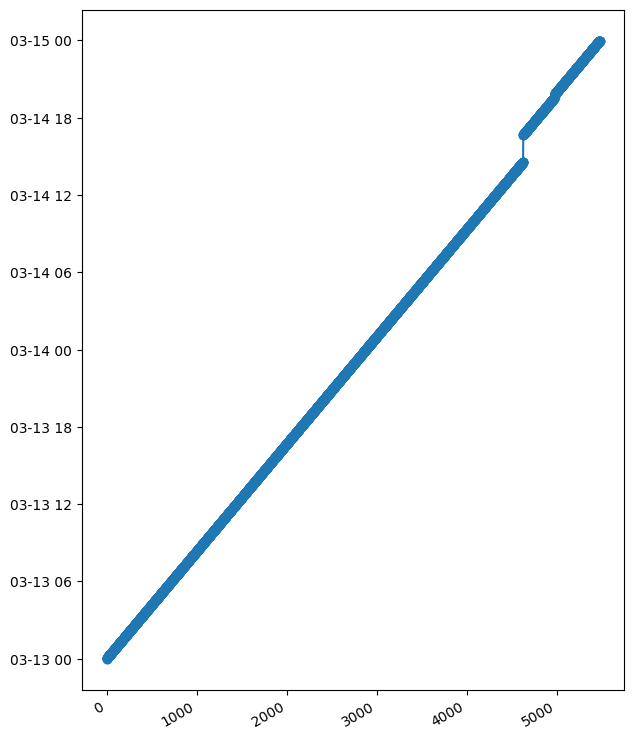

In [5]:
# metadata['files']
file_dates = [mdates.date2num(datetime.datetime.strptime(f, "%y%m%d%H%M%S")) for f in metadata['files']]
fig, ax = plt.subplots(figsize=(7, 10))
ax.plot(file_dates, '-o')
ax.yaxis_date()
fig.autofmt_xdate()
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))

Get the catalog

In [6]:
test_mdates = [datetime.datetime(2016, 1, 1, 0, 0, 0), datetime.datetime(2016, 1, 1, 0, 1, 0)]
mds = mdates.date2num(test_mdates)
minimum_interval = mds[1] - mds[0]

In [7]:
dataframe1 = pd.read_excel(r'C:\Users\issah\Downloads\BradyHotspring\Brady hotspring\Brady_dotspring_catalog.xlsx')

# convert dataframe times to datetime
dates = [datetime.date(dataframe1.iloc[i]['Year'], dataframe1.iloc[i]['Mon'], dataframe1.iloc[i]['Day']) for i in range(len(dataframe1))]
times = [dataframe1.iloc[i]['Time'] for i in range(len(dataframe1))]
datetimes = [datetime.datetime.combine(dates[i], times[i]) for i in range(len(dataframe1))]
plot_times = mdates.date2num(datetimes)

In [8]:
time_intervals = plot_times[1:] - plot_times[:-1]
plot_peaks = [dataframe1.iloc[i]['Peak CC'] for i in range(min(88,len(plot_times))) if time_intervals[i] > minimum_interval]
plot_times = [plot_times[i] for i in range(min(88,len(plot_times))) if time_intervals[i] > minimum_interval]

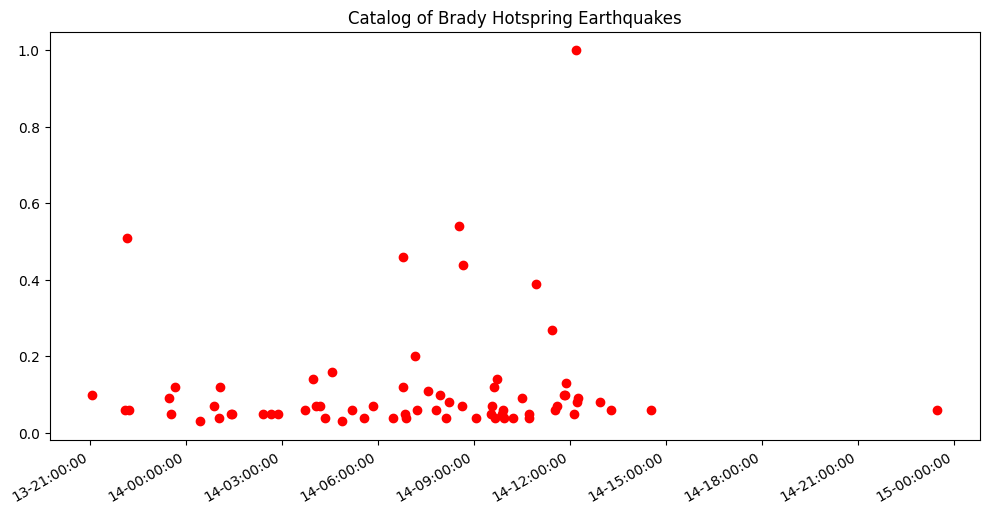

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

im = ax.plot(plot_times, plot_peaks, 'ro')

ax.set_title("Catalog of Brady Hotspring Earthquakes")
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))

In [125]:
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\exact_detection_significance_160312000048.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160312000048.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160314083848.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\exact_detection_significance_160314083848.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\exact_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_16_24\exact_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_16_24\qr_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_16_24\svd_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_21_24\exact_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_21_24\qr_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_21_24\svd_detection_significance_160313000018_160314235949.pkl"

# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_26_24\exact_detection_significance_160313000018_160314235949.pkl"
# file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_26_24\qr_detection_significance_160313000018_160314235949.pkl"
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_26_24\svd_detection_significance_160313000018_160314235949.pkl"

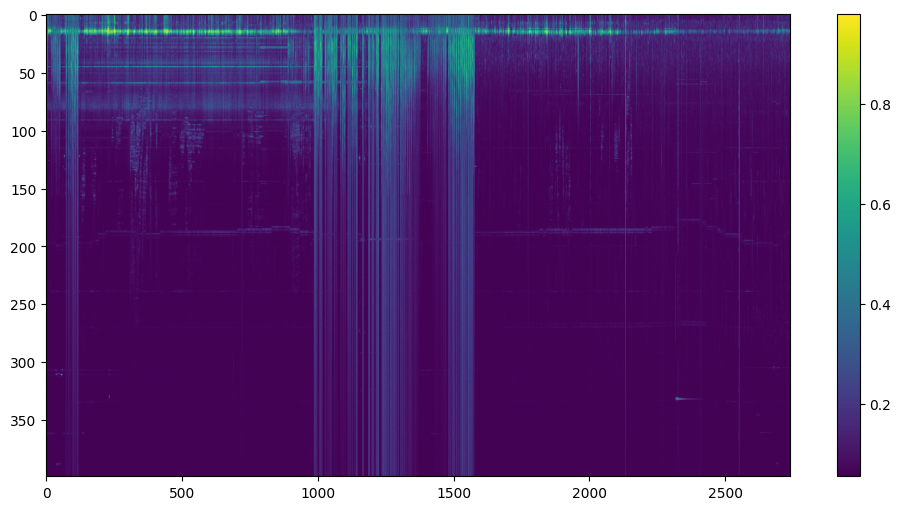

In [126]:
with open(file, "rb") as f:
    detection_significances = pickle.load(f)
plt.figure(figsize=(12, 6))
# plt.plot(detection_significances[:100])

plt.imshow(detection_significances.T[1:], aspect="auto")
plt.colorbar()
# detection_significances.shape

freqs = np.linspace(0, int(metadata["sampling_rate"]/2 * (2/5)), detection_significances.shape[1])
freq_lims = [freqs[1], freqs[-1]]

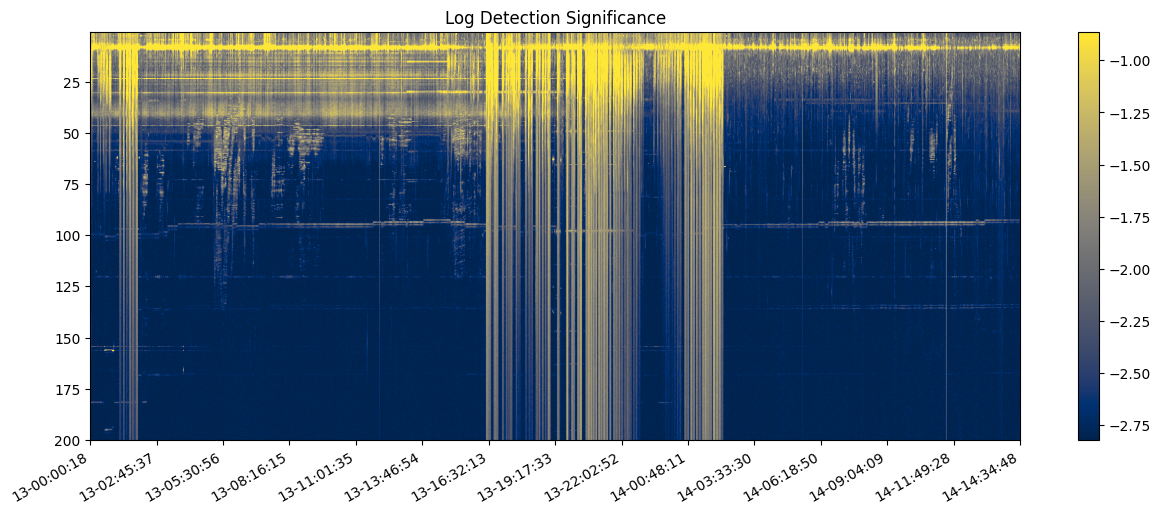

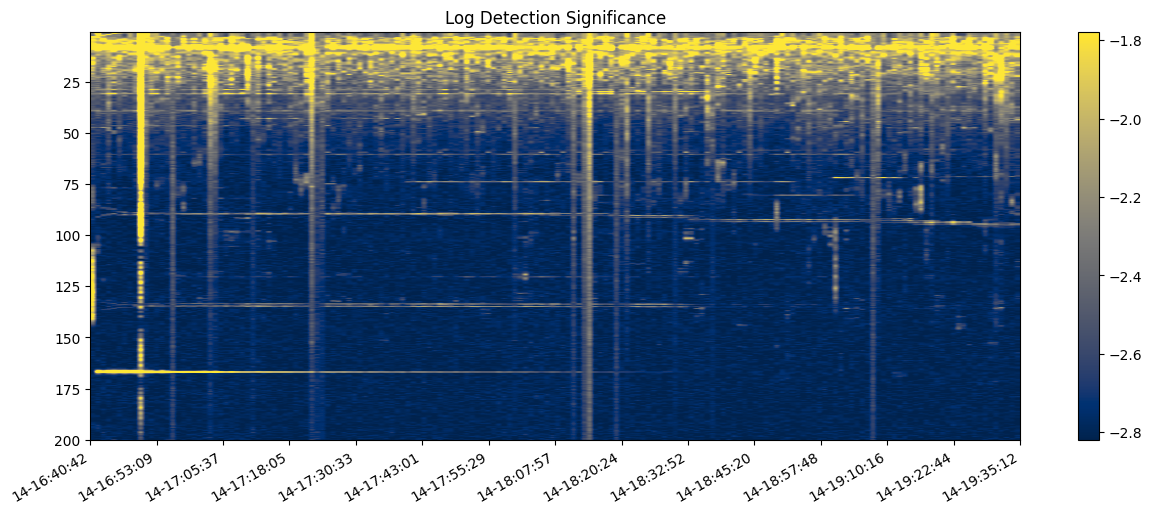

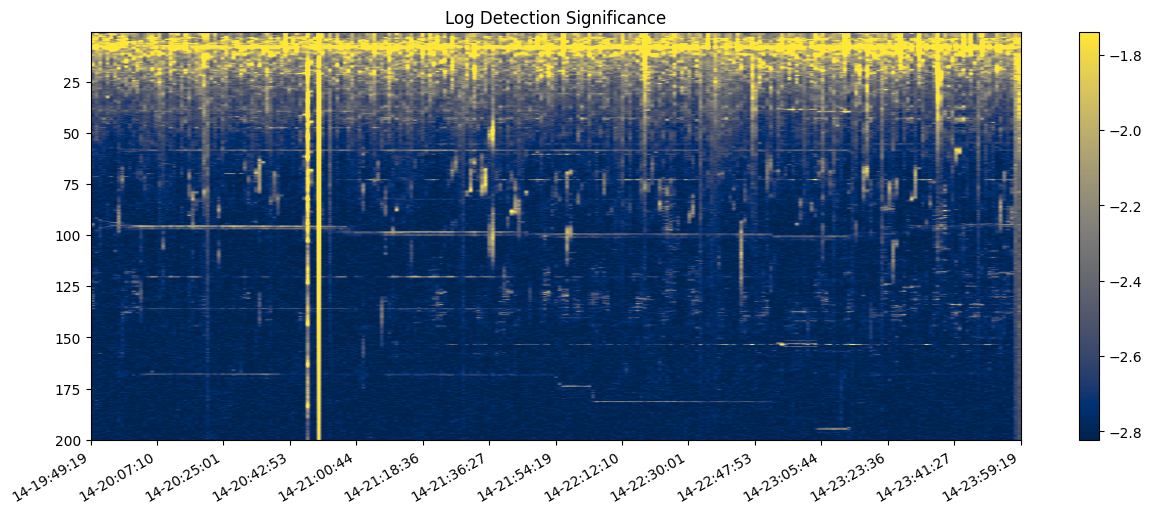

In [127]:
CONTINUOUS_IND_RANGES = [[0,2314], [2314, 2488], [2488, 2740]]
# CONTINUOUS_IND_RANGES = [[0,1157], [1157, 1244], [1244, 1370]]
CONTINUOUS_TIME_RANGES = [[datetime.datetime(2016, 3, 13, 0, 0, 18), datetime.datetime(2016, 3, 14, 14, 34, 48)], [datetime.datetime(2016, 3, 14, 16, 40, 42), datetime.datetime(2016, 3, 14, 19, 35, 12)], [datetime.datetime(2016, 3, 14, 19, 49, 19), datetime.datetime(2016, 3, 14, 23, 59, 19)]]
i = 0
for r in CONTINUOUS_IND_RANGES:
    time_lims = mdates.date2num([CONTINUOUS_TIME_RANGES[i][0], CONTINUOUS_TIME_RANGES[i][1]])
    fig, ax = plt.subplots(figsize=(15, 6))
    log_det_sig = np.log(detection_significances[r[0]:r[1],1:])
    im = ax.imshow(log_det_sig.T, extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(log_det_sig.T, 97), vmin=np.percentile(log_det_sig.T, 10), cmap="cividis")
    ax.set_title("Log Detection Significance")
    ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
    fig.colorbar(im)
    ax.xaxis_date()
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))
    i += 1

C:\Users\issah\AppData\Local\Temp\ipykernel_25360\1379327233.py:10: RuntimeWarning: invalid value encountered in log
  log_det_sig = np.log(mean_rm_ds[r[0]:r[1],1:])


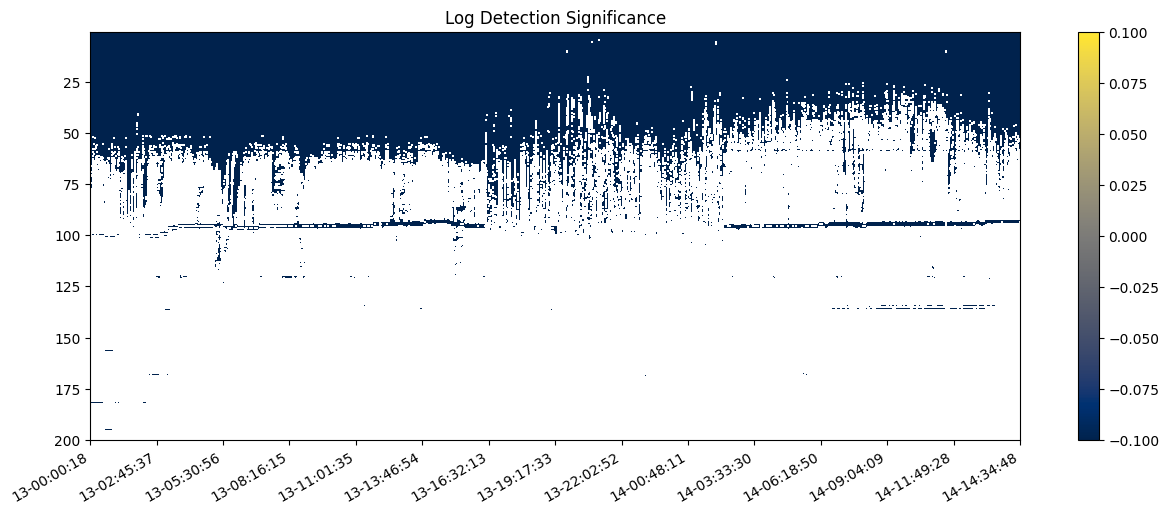

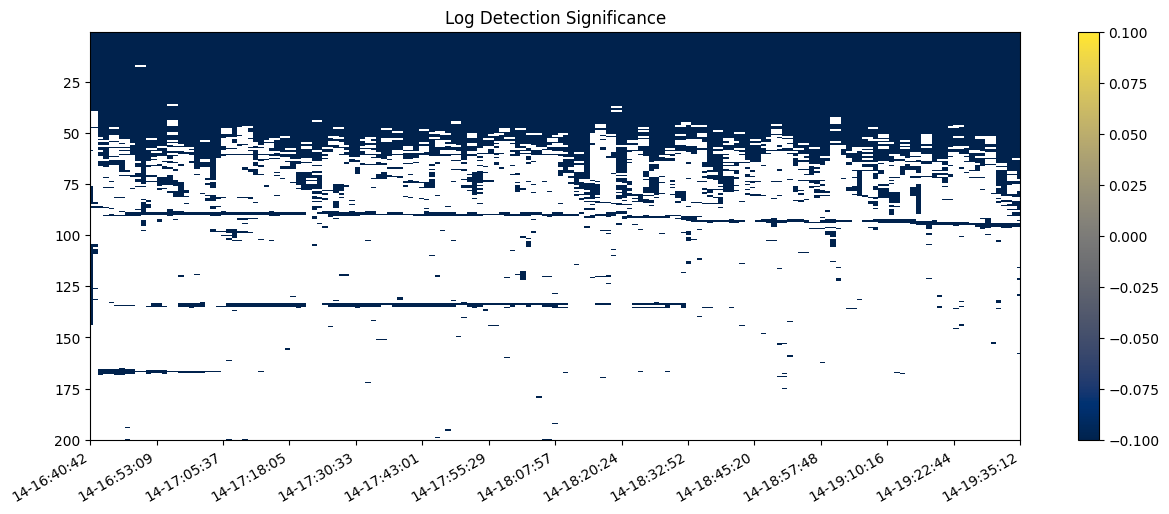

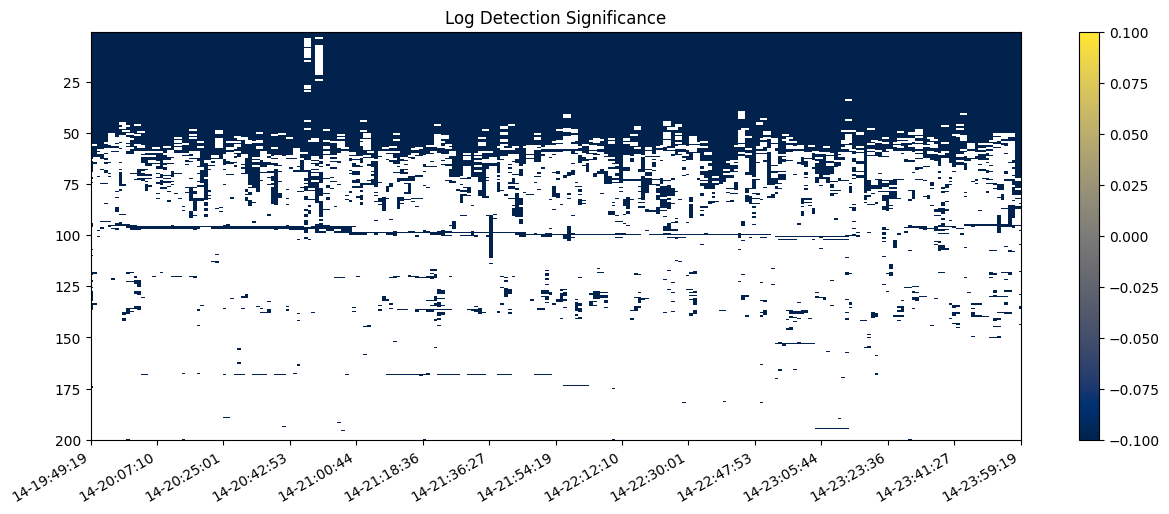

In [144]:
mean_ds = np.median(detection_significances, axis=1)
mean_rm_ds = detection_significances - mean_ds[np.newaxis].T
CONTINUOUS_IND_RANGES = [[0,2314], [2314, 2488], [2488, 2740]]
# CONTINUOUS_IND_RANGES = [[0,1157], [1157, 1244], [1244, 1370]]
CONTINUOUS_TIME_RANGES = [[datetime.datetime(2016, 3, 13, 0, 0, 18), datetime.datetime(2016, 3, 14, 14, 34, 48)], [datetime.datetime(2016, 3, 14, 16, 40, 42), datetime.datetime(2016, 3, 14, 19, 35, 12)], [datetime.datetime(2016, 3, 14, 19, 49, 19), datetime.datetime(2016, 3, 14, 23, 59, 19)]]
i = 0
for r in CONTINUOUS_IND_RANGES:
    time_lims = mdates.date2num([CONTINUOUS_TIME_RANGES[i][0], CONTINUOUS_TIME_RANGES[i][1]])
    fig, ax = plt.subplots(figsize=(15, 6))
    log_det_sig = np.log(mean_rm_ds[r[0]:r[1],1:])
    im = ax.imshow(log_det_sig.T, extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(log_det_sig.T, 97), vmin=np.percentile(log_det_sig.T, 1), cmap="cividis")
    ax.set_title("Log Detection Significance")
    ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
    fig.colorbar(im)
    ax.xaxis_date()
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))
    i += 1

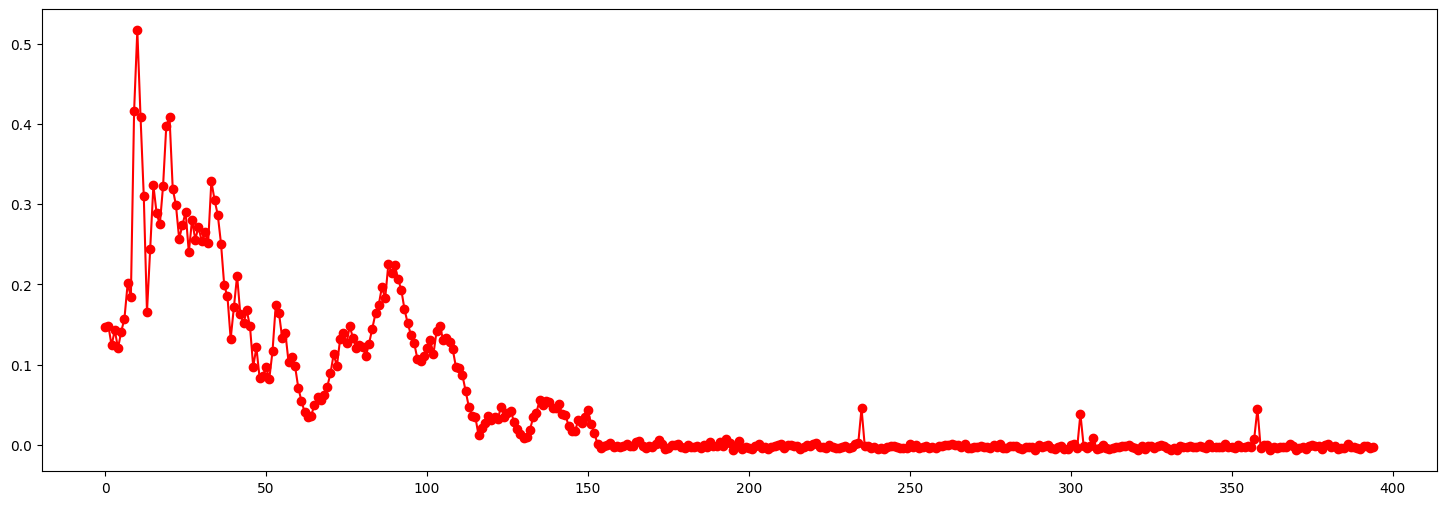

In [145]:
plt.figure(figsize=(18, 6))
plt.plot(mean_rm_ds[20][5:], 'r-o')

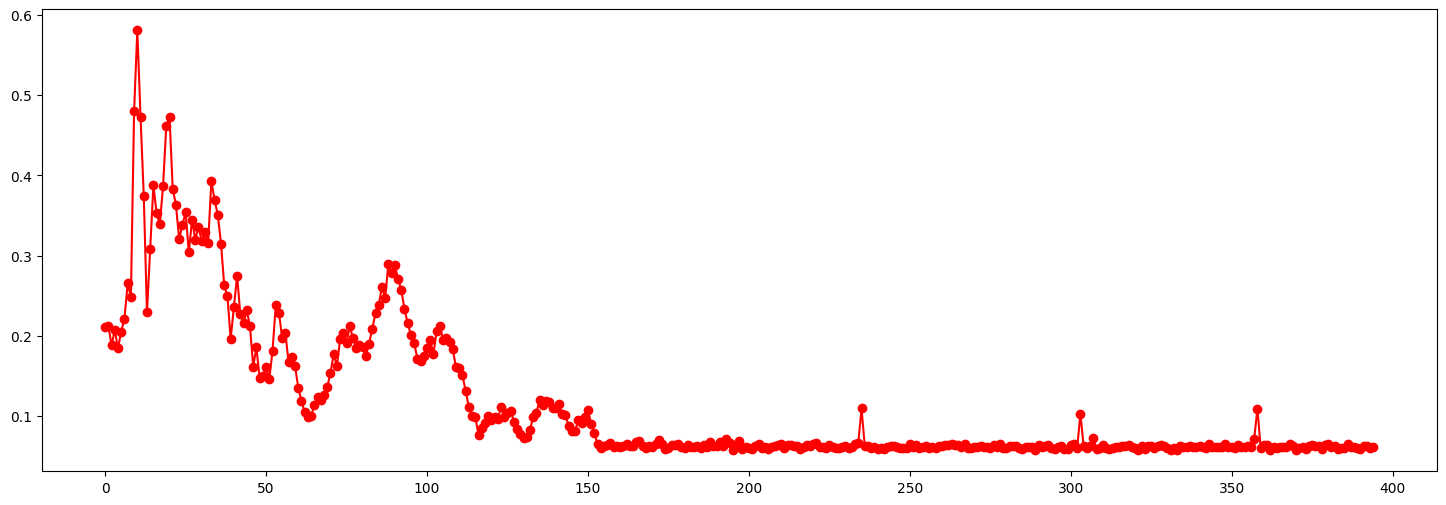

In [146]:
plt.figure(figsize=(18, 6))
plt.plot(detection_significances[20][5:], 'r-o')

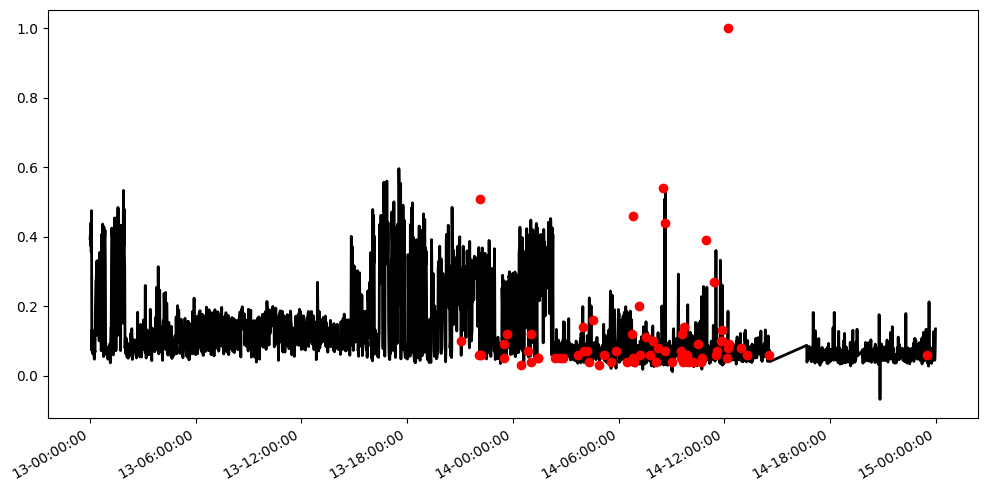

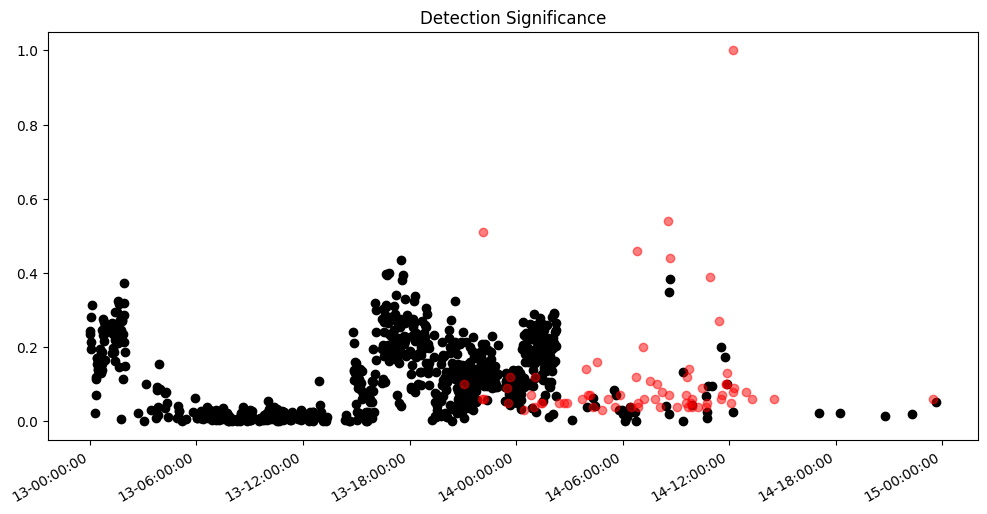

In [147]:
i = 0
threshold = 0.16
last_ind = CONTINUOUS_IND_RANGES[-1][1]
# average_detection = np.mean(detection_significances[:last_ind,30:40], axis=1)
average_detection = np.mean(mean_rm_ds[:last_ind,30:40], axis=1)

times = np.empty(average_detection.shape[0], dtype=object)
# np.linspace(CONTINUOUS_TIME_RANGES[0][0], CONTINUOUS_TIME_RANGES[0][-1], CONTINUOUS_IND_RANGES[0][  ]- CONTINUOUS_IND_RANGES[0][0])
for r in CONTINUOUS_IND_RANGES:
    time_lims = mdates.date2num([CONTINUOUS_TIME_RANGES[i][0], CONTINUOUS_TIME_RANGES[i][1]])
    times[r[0]:r[1]] = np.linspace(time_lims[0], time_lims[-1], min(len(average_detection), r[1])-r[0])
    i += 1

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.plot(times, average_detection, color="black", linewidth=2)
im1 = ax.plot(plot_times, plot_peaks, 'ro')
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))


fig, ax = plt.subplots(figsize=(12, 6))
# log_det_sig = np.log(detection_significances[r[0]:r[1],1:])

# plt.plot(np.linspace(time_lims[0], average_detection[r[0]:r[1]], time_lims[-1], r[1]-r[0]), color="black", linewidth=2)
im = ax.plot(times[average_detection>threshold], average_detection[average_detection>threshold]-threshold, 'o', color="black", linewidth=2)
im1 = ax.plot(plot_times, plot_peaks, 'ro', alpha=0.5)
ax.set_title("Detection Significance")
# ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
# fig.colorbar(im)
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))

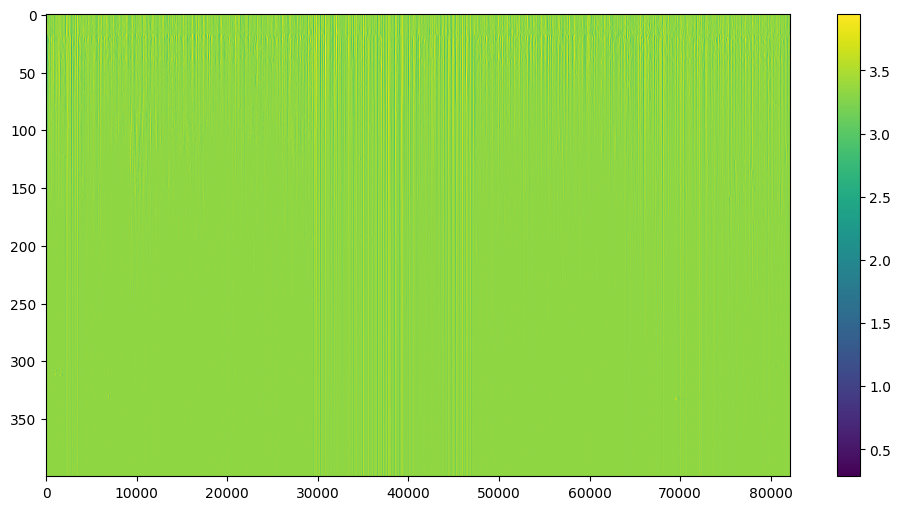

In [84]:
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_eig_estimates_160314083848.pkl"
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\coherence_test_results_08_21_24\qr_eig_estimatess_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    eig_estimates = pickle.load(f)
plt.figure(figsize=(12, 6))
plt.imshow(eig_estimates, aspect="auto", vmax=np.percentile(eig_estimates, 80), vmin=np.percentile(eig_estimates, 1))
plt.colorbar()

In [85]:
average_eig_estimates = np.mean(eig_estimates[11:15], axis=0)
eigs_times = np.empty(eig_estimates.shape[1], dtype=object)
eigs_per_detection = int(eig_estimates.shape[1]/detection_significances.shape[0])
i = 0
for r in CONTINUOUS_IND_RANGES:
    time_lims = mdates.date2num([CONTINUOUS_TIME_RANGES[i][0], CONTINUOUS_TIME_RANGES[i][1]])
    eigs_times[eigs_per_detection * r[0]:eigs_per_detection * r[1]] = np.linspace(time_lims[0], time_lims[-1], (min(len(average_eig_estimates), eigs_per_detection * r[1])-eigs_per_detection * r[0]))
    i += 1

# plt.plot(average_eig_estimates, color="black", linewidth=2)
norm_average_eig_estimates = average_eig_estimates/max(average_eig_estimates)

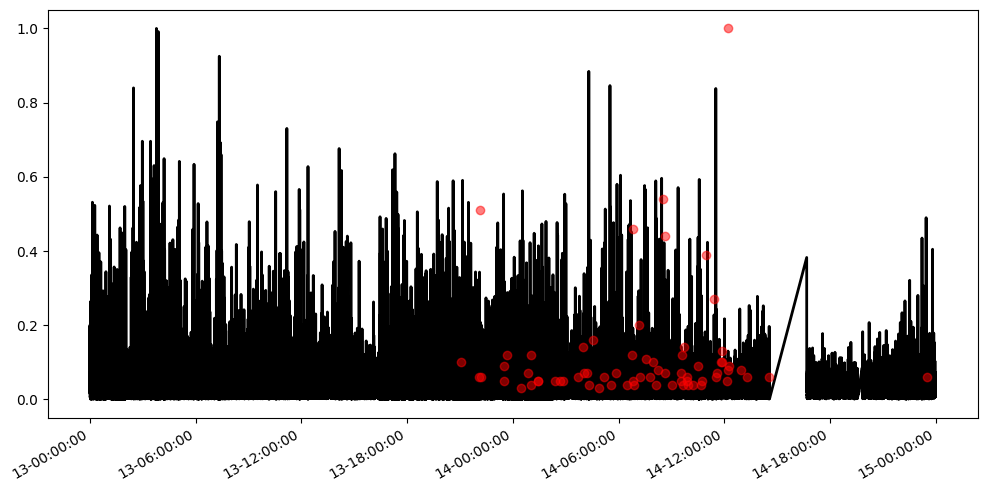

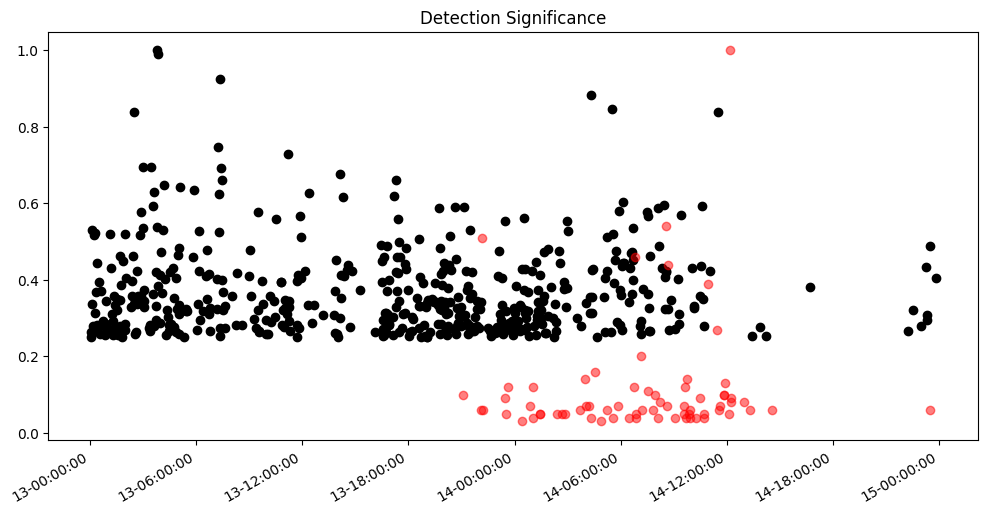

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.plot(eigs_times, norm_average_eig_estimates, color="black", linewidth=2)
im1 = ax.plot(plot_times, plot_peaks, 'ro', alpha=0.5)
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))
# plt.figure(figsize=(12, 6))

fig, ax = plt.subplots(figsize=(12, 6))

im = ax.plot(eigs_times[norm_average_eig_estimates>0.25], norm_average_eig_estimates[norm_average_eig_estimates>0.25], 'o', color="black", linewidth=2)
im1 = ax.plot(plot_times, plot_peaks, 'ro', alpha=0.5)
ax.set_title("Detection Significance")
# ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
# fig.colorbar(im)
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))

In [17]:
re = eig_estimates.reshape((60, int(eig_estimates.shape[1]/30), 30))
# re[0, 0] == eig_estimates[0,:30]
red = re / np.tile(np.sum(re, axis=2), (30, 1, 1)).transpose(1, 2, 0)
# red = re / np.sum(re, axis=2)
red = red.reshape(eig_estimates.shape)
# np.sum(re, axis=2).shape
# red = np.log(red)

In [19]:
start_time = datetime.datetime(2016, 3, 13, 0, 0, 18)
end_time = datetime.datetime(2016, 3, 14, 23, 59, 49)
time_lims = mdates.date2num([start_time, end_time])

# freqs = np.linspace(0, int(metadata["sampling_rate"]/2 * (3/5)), 1/metadata["sub_window_length"])
freqs = np.linspace(0, int(metadata["sampling_rate"]/2 * (3/5)), red.shape[0])
freq_lims = [freqs[1], freqs[-1]]

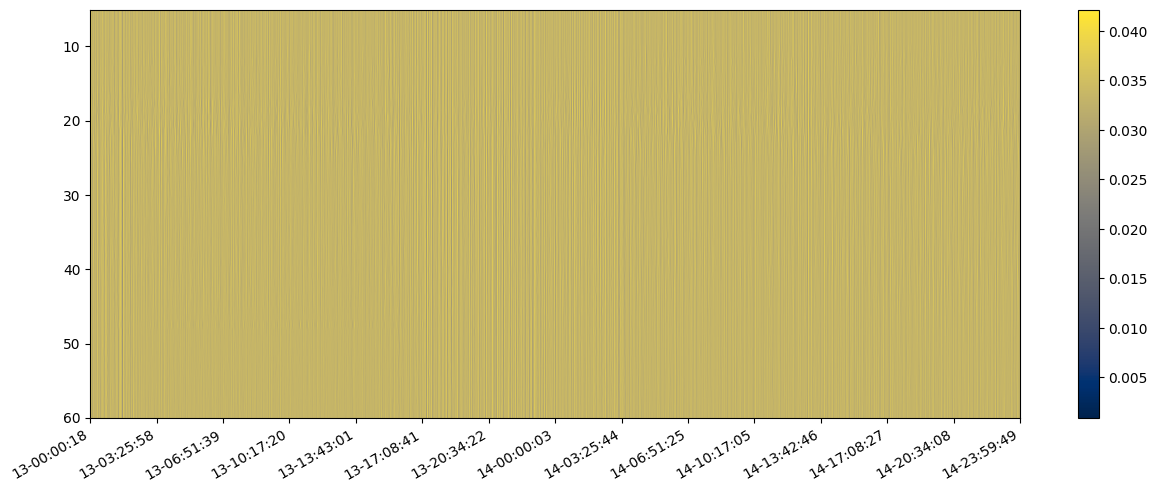

In [20]:
last_ind = -1
# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(15, 6))
im = ax.imshow(red[1:,:last_ind], extent=[time_lims[0],time_lims[-1], 60, freq_lims[0]], aspect="auto", vmax=np.percentile(red[1:,:last_ind], 80), vmin=np.percentile(red[1:,:last_ind], 1), cmap="cividis")
ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
fig.colorbar(im)
ax.xaxis_date()
fig.aut0ofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))
# gca().xaxis.set_major_formatter(...)
# plt.colorbar()

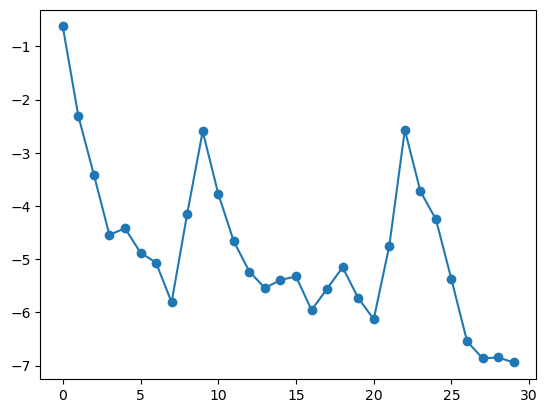

In [6]:
plt.plot(red[0, :30], '-o')
# plt.plot(eig_estimates[0, :60])